In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#CARGAR LAS BASES DE DATOS
os.chdir('/Users/trinimoran/Documents/Ciencia de Datos/CC408-T13/TP3/data')
# os.chdir('C:/Flor/UDESA/Primavera 2024/Ciencia de datos/TP3')

#CAMBIEN ACA SUS CAMINOS
#os.chdir('C:/Users/Nacha/OneDrive/Desktop/Anaconda')

# PARTE 1 

In [2]:
#Primero leemos las bases de datos
eph_04 = pd.read_excel('usu_individual_T124.xlsx')
eph_24 = pd.read_stata('Individual_t104.dta')
eph_04
eph_24



,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45284,285733,1.0,1.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45285,285733,1.0,2.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45286,285733,1.0,3.0,Sí,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000
45287,285733,1.0,4.0,0.0,2004.0,1er. Trimestre,Patagónica,N,Ushuaia - Río Grande,123.0,...,09,09,08,,09,07,0.0,0.0,0.0,00000


In [3]:
# Cambiamos los nombres de las columnas a mayúsculas para que queden iguales y poder trabajar después con ambos DataFrame juntos
eph_04.columns = eph_04.columns.str.upper()
eph_24.columns = eph_24.columns.str.upper()



EJERCICIO 2 
A) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires y unan ambos trimestres en una sola base

In [4]:
#Como ambos DataFrame tiene diferente codificación, los limpiamos por separado según las categorías correspondientes
# Filtramos para CABA (32) y GBA (33) en 2004
eph_04_cleaned = eph_04.drop(eph_04[~eph_04['AGLOMERADO'].isin([32, 33])].index)

# Filtramos para CABA y GBA en 2024 utilizando nombres de aglomerados
eph_24_cleaned = eph_24.drop(eph_24[~eph_24['AGLOMERADO'].isin(['Ciudad de Buenos Aires', 'Partidos del GBA'])].index)

#Esto es para comprobar que quedan datos de ambos años después de la limpieza
print("Datos 2004 después de filtrar:", eph_04_cleaned.shape[0])
print("Datos 2024 después de filtrar:", eph_24_cleaned.shape[0])

# Concatenamos los DataFrames ya filtrados
eph_combined = pd.concat([eph_04_cleaned, eph_24_cleaned], ignore_index=True)

# Vemos datos relevantes del nuevo DataFrame
print("Cantidad de filas en eph_combined después de concatenar:", eph_combined.shape[0])
print("Primeras filas de eph_combined:\n", eph_combined.head())

# Visualizamos la nueva base 
#print(eph_combined.head())
eph_combined

Datos 2004 después de filtrar: 7051
Datos 2024 después de filtrar: 7647
Cantidad de filas en eph_combined después de concatenar: 14698
Primeras filas de eph_combined:
                           CODUSU    ANO4 TRIMESTRE  NRO_HOGAR COMPONENTE H15  \
0  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          1   1   
1  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          2   1   
2  TQRMNOSUWHLKMUCDEIJAH00855260  2024.0         1        1.0          3   1   
3  TQSMNORWVHLLKQCDEIJAH00856914  2024.0         1        1.0          1   1   
4  TQRMNOPQQHLOLRCDEIJAH00855133  2024.0         1        1.0          1   1   

  REGION MAS_500 AGLOMERADO  PONDERA  ... IDECCFR RDECCFR GDECCFR PDECCFR  \
0      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
1      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
2      1       S         33   1810.0  ...     NaN      12    12.0     NaN   
3      1       S         33   2368.0  ...  

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
1,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,2,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2,TQRMNOSUWHLKMUCDEIJAH00855260,2024.0,1,1.0,3,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024.0,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024.0,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004.0,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004.0,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004.0,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004.0,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [5]:
# Imprimimos las columnas como una lista para ver los nombres de todas 
print(list(eph_combined.columns))

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [6]:
#Dejamos todos los datos relevantes (que usamos después) codificados de la misma forma
eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
eph_combined['CH08'] = eph_combined['CH08'].replace({'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Planes y seguros públicos': 3, 'No paga ni le descuentan': 4, 'Ns./Nr.': 9,'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Obra social y Planes y Seguros Públicos': 13, 'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23, 'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos': 123}) 
eph_combined['NIVEL_ED'] = eph_combined['NIVEL_ED'].replace({'Primaria Incompleta (incluye educación especial)': 1, 'Primaria Completa': 2, 'Secundaria Incompleta': 3, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa':6, 'Sin instrucción': 7, 'Ns./Nr.':9})
eph_combined['ESTADO'] = eph_combined['ESTADO'].replace({'Entrevista individual no realizada (no respuesta al cuestion': 0, 'Ocupado': 1, 'Desocupado': 2, 'Inactivo': 3, 'Menor de 10 años':4}) 
eph_combined['CAT_INAC'] = eph_combined['CAT_INAC'].replace({'Jubilado/pensionado': 1, 'Rentista': 2, 'Estudiante': 3,'Ama de casa': 4, 'Menor de 6 años': 5, 'Discapacitado': 6, 'Otros':7})


/var/folders/_1/nd52h6kn0dx9vmxm6y5ps0p40000gn/T/ipykernel_17199/2233806067.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH04'] = eph_combined['CH04'].replace({'Varón': 1, 'Mujer': 2})
/var/folders/_1/nd52h6kn0dx9vmxm6y5ps0p40000gn/T/ipykernel_17199/2233806067.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eph_combined['CH07'] = eph_combined['CH07'].replace({'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5})
/var/folders/_1/nd52h6kn0dx9vmxm6y5ps0p40000gn/T/ipykernel_17199/2233

In [7]:
#esta después la podemos sacar, era para chequear un error que me salía!!
estado_counts_2024 = eph_combined[eph_combined['ANO4'] == 2024]['ESTADO'].value_counts()

print("\nConteo de ESTADO para 2024:")
print(estado_counts_2024)


Conteo de ESTADO para 2024:
ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64


B. Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas.

In [8]:
# Eliminamos las observaciones con datos que no tienen sentido 
# CH06: edad
# PP03D: cantidad de ocupaciones 
# PP08D1: Monto por sueldos / jornales, salario familiar, horas extras, otras bonificaciones habituales y tickets, vales o similares percibidos en el mes de referencia 
# P21: MONTO DE INGRESO DE LA OCUPACIÓN PRINCIPAL 
# Convertimos las columnas relevantes a tipo numérico
cols_to_convert = ['CH06', 'PP03D', 'PP08D1', 'P21']
eph_combined[cols_to_convert] = eph_combined[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Eliminamos las observaciones con datos que no tienen sentido 
eph_combined.drop(eph_combined[ (eph_combined['CH06'] < 0) | (eph_combined['PP03D'] < 0) | (eph_combined['PP08D1'] < 0) | (eph_combined['P21'] < 0)].index, inplace=True)

# Imprimimos la cantidad de datos restantes después de la limpieza
print("Cantidad de datos después de la limpieza:", len(eph_combined))

#acá tenemos que redactar la justificación, no puse más porque no terminamos más si controlamos todo todo, si ven otra relevante o quieren sacar alguna háganlo

Cantidad de datos después de la limpieza: 13701


C. Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados.

In [9]:
# Convertimos 'ano4' a tipo entero para eliminar los decimales y asegurarnos que todos los valores sean consistentes
eph_combined['ANO4'] = eph_combined['ANO4'].astype(float).astype(int)
eph_combined

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


Registros 2004: 7647
Registros 2024: 6054
Composición 2004:
 CH04
2    4045
1    3602
Name: count, dtype: int64
Composición 2024:
 CH04
2    3271
1    2783
Name: count, dtype: int64
DataFrame de composición:
       2004  2024
CH04            
1     3602  2783
2     4045  3271


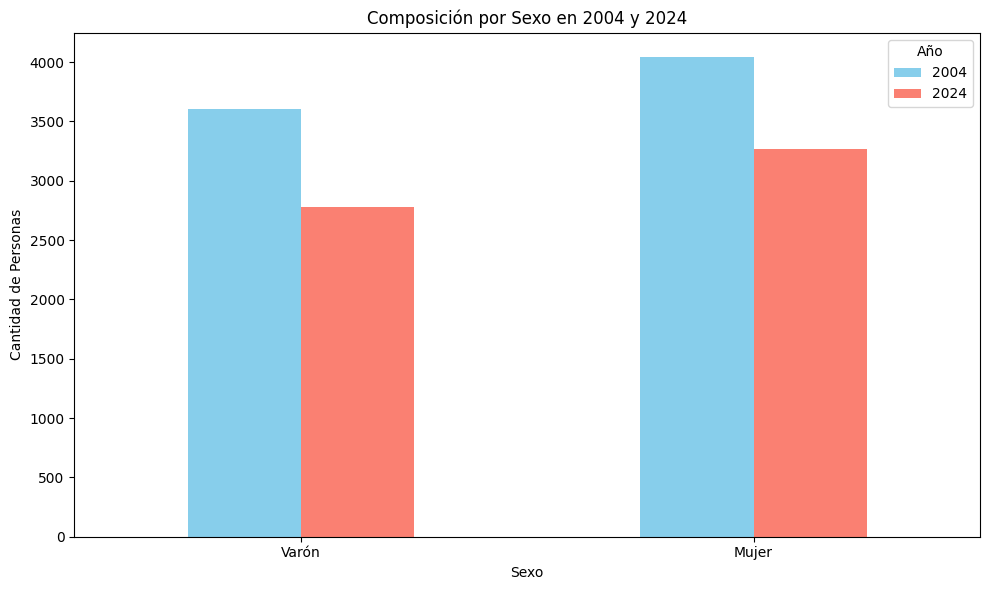

In [10]:
# Filtramos los datos
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024]

# Verificamos cuántos registros hay después del filtrado
print(f"Registros 2004: {len(datos_2004)}")
print(f"Registros 2024: {len(datos_2024)}")

# Contamos la cantidad de personas por sexo en cada año
composicion_2004 = datos_2004['CH04'].value_counts()
composicion_2024 = datos_2024['CH04'].value_counts()

# Imprimimos los conteos para verificar si hay datos
print("Composición 2004:\n", composicion_2004)
print("Composición 2024:\n", composicion_2024)

# Reindexamos ambos conteos con los valores 1 y 2
composicion_2004 = composicion_2004.reindex([1, 2], fill_value=0)
composicion_2024 = composicion_2024.reindex([1, 2], fill_value=0)

# Creamos un DataFrame para graficar
df_composicion = pd.DataFrame({'2004': composicion_2004,'2024': composicion_2024})

# Verificamos el DataFrame
print("DataFrame de composición:\n", df_composicion)

# Crear gráfico de barras
df_composicion.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['Varón', 'Mujer'], rotation=0)  # Mostrar los códigos en el eje X
plt.legend(title='Año')
plt.tight_layout()  # Ajustar el gráfico
plt.show()


D. Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para

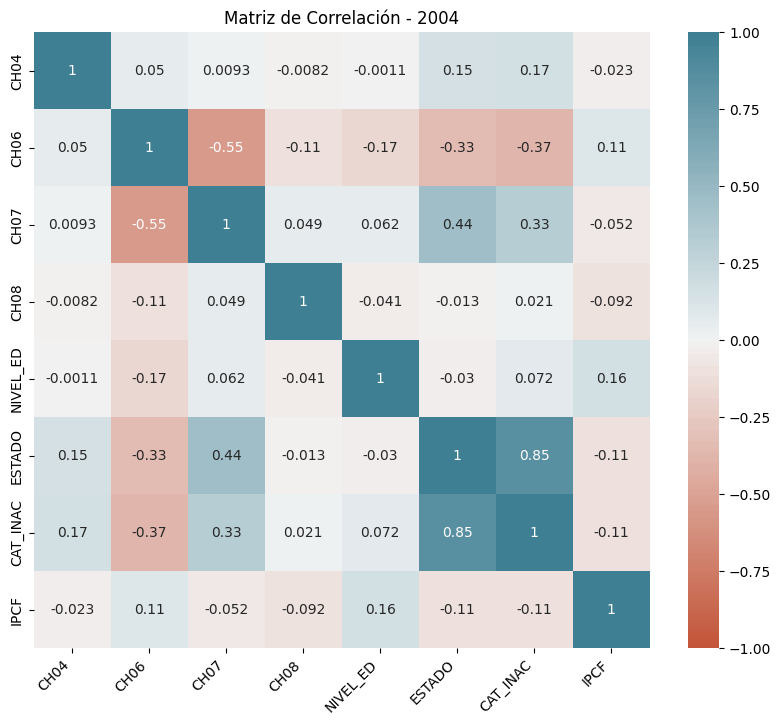

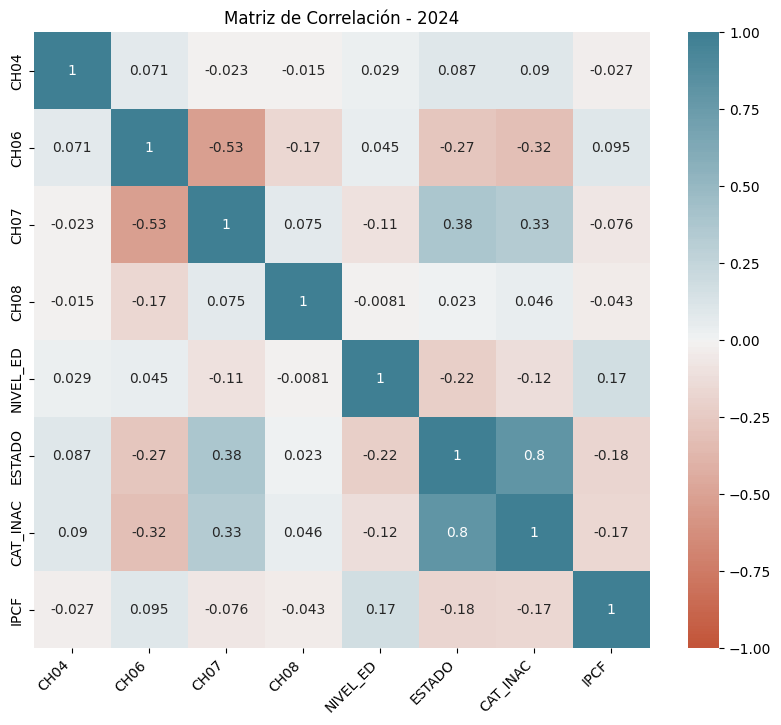

In [11]:
# Filtramos los datos para 2004 y 2024
datos_2004 = eph_combined[eph_combined['ANO4'] == 2004][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
datos_2024 = eph_combined[eph_combined['ANO4'] == 2024][['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Eliminamos filas con NaN
datos_2004.dropna(inplace=True)
datos_2024.dropna(inplace=True)

import seaborn as sns

# Creamos matrices de correlación para los años 2004 y 2024
corr_2004 = datos_2004.corr()
corr_2024 = datos_2024.corr()

# Configuramos el gráfico para la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_2004, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)  # Mostramos valores de correlación en la matriz
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.title('Matriz de Correlación - 2004')
plt.show()

# Configuramos el gráfico para la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_2024, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True,annot=True)  # Mostramos valores de correlación en la matriz
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Matriz de Correlación - 2024')
plt.show()



E. ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [13]:
# Contamos la cantidad de desocupados
desocupados = eph_combined[(eph_combined['ESTADO'] == 2)]
cantidad_desocupados = desocupados.shape[0]

# Contamos la cantidad de inactivos
inactivos = eph_combined[(eph_combined['ESTADO'] == 3)]
cantidad_inactivos = inactivos.shape[0]

print(f"Cantidad de desocupados: {cantidad_desocupados}")
print(f"Cantidad de inactivos: {cantidad_inactivos}")

# Calculamos la media de IPCF según cada estado
media_ipcf_por_estado = eph_combined.groupby('ESTADO')['IPCF'].mean()

print("Media de IPCF según estado:")
print(media_ipcf_por_estado)


Cantidad de desocupados: 839
Cantidad de inactivos: 5462
Media de IPCF según estado:
ESTADO
0        10.300654
1    125240.392119
2     31655.957950
3     63863.080627
4     40220.538438
Name: IPCF, dtype: float64


3. ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [14]:
# Contamos la cantidad de personas que no respondieron la condición de actividad
no_respondieron = eph_combined[(eph_combined['ESTADO'] == 0)]
cantidad_no_respondieron = no_respondieron.shape[0]
print(f"Cantidad de personas que no respondieron su condición de actividad: {cantidad_no_respondieron}")

# Creamos una base con las observaciones que respondieron la condición de actividad 
respondieron = eph_combined[eph_combined['ESTADO'].isin([1, 2, 3, 4])]

# Creamos una base con las observaciones que no respondieron la condición de actividad
norespondieron = eph_combined[eph_combined['ESTADO'] == 0]


Cantidad de personas que no respondieron su condición de actividad: 51


In [15]:
# Imprimimos cada DataFrame para verificarlo 
print("Observaciones en la base 'respondieron':")
respondieron

Observaciones en la base 'respondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,9.0,NaN,9,3324.0,NaN,NaN,NaN,NaN
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,10.0,NaN,10,2575.0,NaN,NaN,NaN,NaN
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,08,08,,09,NaN,0.0,0.0,0.0,00000
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,02,,02,NaN,0.0,0.0,0.0,00000


In [16]:
print("\nObservaciones en la base 'norespondieron':")
norespondieron


Observaciones en la base 'norespondieron':


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP
14,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,2,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
15,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,3,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
16,TQRMNOQVXHMOQPCDEIJAH00801978,2024,1,1.0,4,2,1,S,33,4537.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
24,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,1,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
25,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,2,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
26,TQRMNOQUPHKKSSCDEIJAH00856902,2024,1,1.0,3,2,1,S,33,122.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
975,TQRMNOQYQHMMRNCDEIJAH00802156,2024,1,1.0,1,2,1,S,33,1794.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2014,TQRMNOSPUHMMOQCDEIJAH00802618,2024,1,1.0,3,2,1,S,33,2159.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2119,TQRMNOPWSHMKTUCDEIJAH00802498,2024,1,1.0,1,2,1,S,33,3707.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN
2486,TQRMNOPWUHKMKPCDEIJAH00858487,2024,1,1.0,2,2,1,S,33,3046.0,...,NaN,12,12.0,NaN,12,0.0,NaN,NaN,NaN,NaN


4. Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.

In [17]:
# Contamos la cantidad de personas en cada estado para 2004 y 2024
estado_counts_2004 = eph_combined[eph_combined['ANO4'] == 2004]['ESTADO'].value_counts()
estado_counts_2024 = eph_combined[eph_combined['ANO4'] == 2024]['ESTADO'].value_counts()

print("Conteo de ESTADO para 2004:")
print(estado_counts_2004)
print("\nConteo de ESTADO para 2024:")
print(estado_counts_2024)

Conteo de ESTADO para 2004:
ESTADO
1    3079
3    2800
4    1230
2     528
0      10
Name: count, dtype: int64

Conteo de ESTADO para 2024:
ESTADO
3    2662
1    2278
4     762
2     311
0      41
Name: count, dtype: int64


     2004  2024
PEA            
0    4030  3424
1    3607  2589


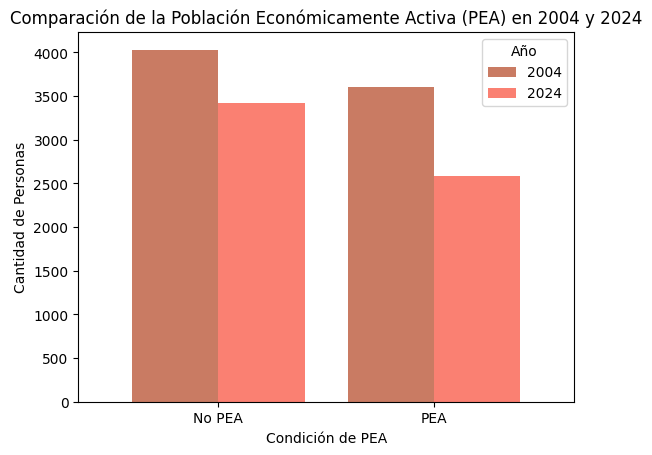

In [33]:
import numpy as np

# Agregamos la columna PEA
respondieron.loc[:,'PEA'] = np.where(respondieron['ESTADO'].isin([1, 2]), 1, 0)  # 1 para Ocupado y Desocupado, 0 para otros

# Filtramos los datos para los años 2004 y 2024
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Contamos la cantidad de Población Económicamente Activa y no activa para ambos años
composicion_2004 = respondieron_2004['PEA'].value_counts()
composicion_2024 = respondieron_2024['PEA'].value_counts()

# Creamos un DataFrame para visualizarlos mejor
composicion_df = pd.DataFrame({'2004': composicion_2004, '2024': composicion_2024}).fillna(0)
print(composicion_df)

# Graficamos la composición por PEA para 2004 y 2024
composicion_df.plot(kind='bar', width=0.8,  color=['#c97b63', 'salmon'])
plt.title('Comparación de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('Condición de PEA')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['No PEA', 'PEA'], rotation=0)
plt.legend(title='Año', loc='upper right')
plt.show()


5. Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

     2004  2024
PET            
1    4893  3783
0    2744  2230


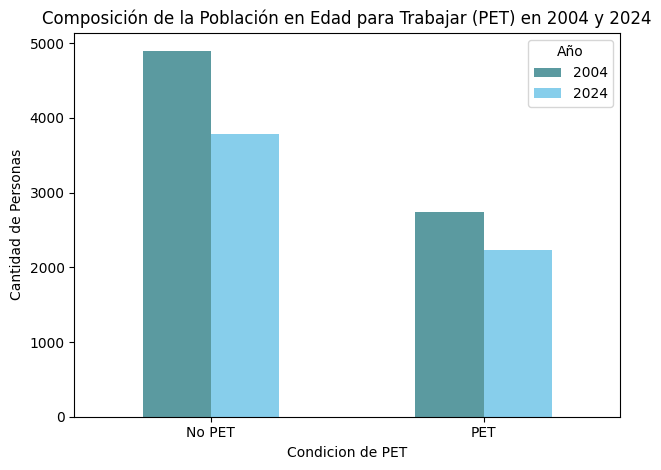

In [34]:
# Crear la columna PET en respondieron que vale 1 si la edad esta entre 15 y 65
respondieron.loc[:, 'PET'] = respondieron['CH06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

#vuelvo a filtrar por año para que incluya esta columna
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

# Contar la cantidad de personas en PEA y no PEA para cada año
pet_2004 = respondieron_2004['PET'].value_counts()
pet_2024 = respondieron_2024['PET'].value_counts()

# Crear un DataFrame para facilitar la visualización
df_pet = pd.DataFrame({
    '2004': pet_2004,
    '2024': pet_2024
}) # Rellenar valores NaN con 0 si falta alguna categoría

# Verificar la estructura del DataFrame
print(df_pet)

# Graficar la composición por PEA para 2004 y 2024
df_pet.plot(kind='bar', color=['#5b9aa0', 'skyblue'])
plt.title('Composición de la Población en Edad para Trabajar (PET) en 2004 y 2024')
plt.xlabel('Condicion de PET')
plt.ylabel('Cantidad de Personas')
plt.xticks(ticks=[0, 1], labels=['No PET', 'PET'], rotation=0)
plt.legend(title='Año', loc = 'upper right')
plt.tight_layout()
plt.show()

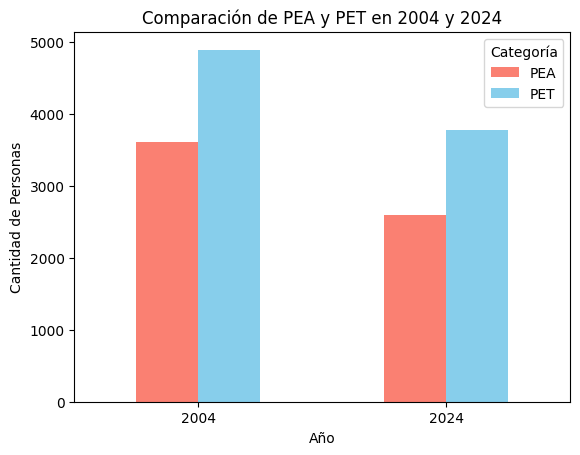

In [35]:
#GRAFICO COMPARACION 
# Creamos tablas de resumen para PEA y PET en cada año
pea_pet_2004 = respondieron_2004[['PEA', 'PET']].sum()
pea_pet_2024 = respondieron_2024[['PEA', 'PET']].sum()

# Combinamos los datos en un DataFrame con años en columnas y PEA/PET como índice
pea_pet_summary = pd.DataFrame({'2004': pea_pet_2004, '2024': pea_pet_2024})

# Transponemos para tener los años en el eje X y reorganizamos el gráfico
pea_pet_summary = pea_pet_summary.T

# Realizamos un gráfico de barras
pea_pet_summary.plot(kind='bar', color=['salmon', 'skyblue'])
plt.title("Comparación de PEA y PET en 2004 y 2024")
plt.xlabel("Año")
plt.ylabel("Cantidad de Personas")
plt.xticks(rotation=0)
plt.legend(title='Categoría')
plt.show()

In [36]:
# PUNTO 6:  agreguen la base respondieron una columna desocupado 

respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
print(respondieron['DESOCUPADO'].sum())

839


In [37]:
#  agreguen la base respondieron una columna desocupado 
respondieron.loc[:, 'DESOCUPADO'] = respondieron['ESTADO'].apply(lambda x: 1 if x == 2 else 0)
#vuelvo a filtrar por año para que incluya esta columna
respondieron_2004 = respondieron[respondieron['ANO4'] == 2004]
respondieron_2024 = respondieron[respondieron['ANO4'] == 2024]

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP,PEA,PET,DESOCUPADO
7051,125098,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,,04,NaN,0.0,0.0,0.0,00000,0,0,0
7052,125397,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,,00,NaN,0.0,0.0,0.0,00000,1,0,0
7053,125515,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,,05,NaN,0.0,0.0,0.0,00020,0,0,0
7054,125558,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,,06,NaN,0.0,0.0,0.0,00000,1,1,0
7055,125558,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,,06,NaN,0.0,0.0,0.0,00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,288171,2004,1er. Trimestre,1.0,3.0,0.0,Gran Buenos Aires,S,Partidos del GBA,1454.0,...,,09,NaN,0.0,0.0,0.0,00000,0,0,0
14694,288405,2004,1er. Trimestre,1.0,1.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,1,1,0
14695,288405,2004,1er. Trimestre,1.0,2.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,1,1,0
14696,288405,2004,1er. Trimestre,1.0,3.0,Sí,Gran Buenos Aires,S,Partidos del GBA,1673.0,...,,02,NaN,0.0,0.0,0.0,00000,0,0,0


In [38]:
# personas desocupadas en 2004
desocupados_2004 = respondieron_2004['DESOCUPADO'].sum()
print("Personas desocupadas en 2004:", desocupados_2004)

Personas desocupadas en 2004: 528


In [39]:
desocupados_2024 = respondieron_2024['DESOCUPADO'].sum()
print("Personas desocupadas en 2024:", desocupados_2024)

Personas desocupadas en 2024: 311


In [43]:
#parte opcional DEL PUNTO 6 A)

# Calcular la proporción de desocupados por nivel educativo en 2004
prop_desocupados_2004 = respondieron_2004.groupby('NIVEL_ED')['DESOCUPADO'].mean() * 100
# Calcular la proporción de desocupados por nivel educativo en 2024
prop_desocupados_2024 = respondieron_2024.groupby('NIVEL_ED')['DESOCUPADO'].mean() * 100

# Combinar ambos resultados en un DataFrame para comparar
comparacion_desocupados = pd.DataFrame({
    'Desocupación 2004 (%)': prop_desocupados_2004,
    'Desocupación 2024 (%)': prop_desocupados_2024
})

print(comparacion_desocupados)

# Creamos un DataFrame para las proporciones y facilitamos el gráfico
#df_proporciones = pd.DataFrame({
#    '2004': proporciones_2004,
#    '2024': proporciones_2024
#}).reset_index()

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=comparacion_desocupados.melt(id_vars='NIVEL_ED', var_name='Año', value_name='Proporción'),
            x='NIVEL_ED', y='Proporción', hue='Año', palette=['#4C72B0', '#55A868'])
plt.title('Proporción de Desocupados por Nivel Educativo en 2004 vs 2024')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Desocupados')
plt.legend(title='Año')
plt.xticks(ticks=range(9), labels=['Primaria Inc', 'Primaria Com', 'Secundaria Inc', 'Secundaria Com', 'Universitaria Inc', 'Universitaria Com', 'Sin instrucción', 'Ns./Nr.'], rotation=45)
plt.tight_layout()
plt.show()

          Desocupación 2004 (%)  Desocupación 2024 (%)
NIVEL_ED                                              
1                      3.060498               0.236128
2                      6.584615               5.376344
3                      7.798834               4.313725
4                     12.650046              10.204082
5                     13.571429               8.111702
6                      5.564142               3.305785
7                      0.372671               0.000000


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['NIVEL_ED']"

<Figure size 1200x800 with 0 Axes>

In [48]:
#PARTE 2 
# CLASIFICACION

#predecir si una persona está desocupada o no con distintas variables de características individuales.

respondieron_2024

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECCFR,ADECCFR,PONDIH,PJ1_1,PJ2_1,PJ3_1,IDIMPP,PEA,PET,DESOCUPADO
0,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1.0,1,1,1,S,33,1810.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,1,0,0
3,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1.0,1,1,1,S,33,2368.0,...,NaN,9,3324.0,NaN,NaN,NaN,NaN,1,1,0
4,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1.0,1,1,1,S,33,1223.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,0,0,0
7,TQRMNOPTWHJLQRCDEIJAH00795141,2024,1,1.0,1,1,1,S,33,1682.0,...,NaN,10,2575.0,NaN,NaN,NaN,NaN,1,0,0
11,TQRMNOSTUHMMQTCDEIJAH00802466,2024,1,1.0,2,1,1,S,33,1866.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,TQRMNORWVHLKOPCDEIIAD00861660,2024,1,1.0,6,1,1,S,32,590.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,0,1,0
7041,TQRMNOPSYHJLOQCDEIIAD00794774,2024,1,1.0,1,1,1,S,32,1376.0,...,NaN,10,1781.0,NaN,NaN,NaN,NaN,1,1,0
7042,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1.0,1,1,1,S,33,2818.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,0,0,0
7043,TQRMNOSXVHJKKMCDEIJAH00794775,2024,1,1.0,2,1,1,S,33,2818.0,...,NaN,12,0.0,NaN,NaN,NaN,NaN,1,1,1


In [50]:
# PUNTO 1) 
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Para 2004
y_2004 = respondieron_2004['DESOCUPADO']
# todas las columnas menos desocupado
X_2004 = respondieron_2004[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Partición
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)

# columna de unos CHEQUEAR
X_train_2004 = pd.concat([pd.Series(1, index=X_train_2004.index, name="Intercepto"), X_train_2004], axis=1)
X_test_2004 = pd.concat([pd.Series(1, index=X_test_2004.index, name="Intercepto"), X_test_2004], axis=1)

# Para 2024
y_2024 = respondieron_2024['DESOCUPADO']
X_2024 = respondieron_2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]

# Partición
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)
# columna de unos
X_train_2024 = pd.concat([pd.Series(1, index=X_train_2024.index, name="Intercepto"), X_train_2024], axis=1)
X_test_2024 = pd.concat([pd.Series(1, index=X_test_2024.index, name="Intercepto"), X_test_2024], axis=1)

In [45]:
# 2)
# reportar luego la matriz de confusión,  la curva ROC, los valores de AUC y de Accuracy de cada uno:
# Regresión logística
# Análisis discriminante lineal
# KNN con k=3
# Naive Bayes